# **Početno učitavanje podataka**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import seaborn as sns
import numpy as np


url = 'https://raw.githubusercontent.com/abanic7/PredictingNBAShots/main/shot_logs.csv?token=GHSAT0AAAAAABZ76MCMLWGXC2RYE6MJIB7KY43MWTQ'
df_original = pd.read_csv(url)
df = df_original.copy()
#print(plt.style.available)
plt.style.use('seaborn')

# **Pregled podataka**

In [3]:
#postavljanje opcije za prikaz prvih 100 zapisa
pd.set_option('display.max_columns',100)

#prikaz prvih 5 zapisa
df.head(5)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [4]:
df.describe(include='all')


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
count,1.280690e+05,128069,128069,128069,128069.000000,128069.000000,128069.000000,128069,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069.000000
unique,NaN,1808,2,2,NaN,NaN,NaN,719,NaN,NaN,NaN,NaN,NaN,2,473,NaN,NaN,NaN,NaN,281,NaN
top,NaN,"FEB 07, 2015 - DAL vs. POR",A,W,NaN,NaN,NaN,0:01,NaN,NaN,NaN,NaN,NaN,missed,"Ibaka, Serge",NaN,NaN,NaN,NaN,james harden,NaN
freq,NaN,105,64135,64595,NaN,NaN,NaN,859,NaN,NaN,NaN,NaN,NaN,70164,814,NaN,NaN,NaN,NaN,1054,NaN
mean,2.140045e+07,NaN,NaN,NaN,0.208723,6.506899,2.469427,NaN,12.453344,2.023355,2.765901,13.571504,2.264670,NaN,NaN,159038.487284,4.123015,0.452139,0.997314,NaN,157238.251247
std,2.578773e+02,NaN,NaN,NaN,13.233267,4.713260,1.139919,NaN,5.763265,3.477760,3.043682,8.888964,0.441159,NaN,NaN,78791.172947,2.756446,0.497706,1.130978,NaN,79362.389336
min,2.140000e+07,NaN,NaN,NaN,-53.000000,1.000000,1.000000,NaN,0.000000,0.000000,-163.600000,0.000000,2.000000,NaN,NaN,708.000000,0.000000,0.000000,0.000000,NaN,708.000000
25%,2.140023e+07,NaN,NaN,NaN,-8.000000,3.000000,1.000000,NaN,8.200000,0.000000,0.900000,4.700000,2.000000,NaN,NaN,101249.000000,2.300000,0.000000,0.000000,NaN,101162.000000
50%,2.140045e+07,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,12.300000,1.000000,1.600000,13.700000,2.000000,NaN,NaN,201949.000000,3.700000,0.000000,0.000000,NaN,201939.000000
75%,2.140067e+07,NaN,NaN,NaN,9.000000,9.000000,3.000000,NaN,16.675000,2.000000,3.700000,22.500000,3.000000,NaN,NaN,203079.000000,5.300000,1.000000,2.000000,NaN,202704.000000


In [5]:
df.columns.values

array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

In [6]:
#Pregled podataka radi provjere postoje li nedostajuće vrijednosti
#Vidimo da fali 5567 vrijednosti atributa SHOT_CLOCK
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

In [7]:
#Pregled radi provjere monotonih podataka
df.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

In [8]:
df[df.SHOT_CLOCK.isnull()]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
24,21400845,"FEB 25, 2015 - CHA @ CHI",A,W,12,6,2,0:04,NaN,0,0.7,25.2,3,missed,"Butler, Jimmy",202710,3.6,0,0,brian roberts,203148
54,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,14,4,0:01,NaN,5,3.7,34.4,3,missed,"Hill, George",201588,3.6,0,0,brian roberts,203148
76,21400742,"FEB 05, 2015 - CHA vs. WAS",H,W,7,10,3,0:01,NaN,2,3.6,13.1,2,made,"Butler, Rasual",2446,2.5,1,2,brian roberts,203148
129,21400611,"JAN 19, 2015 - CHA vs. MIN",H,W,25,7,2,0:02,NaN,5,5.0,12.0,2,missed,"Williams, Mo",2590,4.0,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128008,21400138,"NOV 15, 2014 - BKN @ POR",A,L,-10,3,2,0:02,NaN,0,1.2,20.6,3,missed,"Blake, Steve",2581,1.7,0,0,jarrett jack,101127
128017,21400138,"NOV 15, 2014 - BKN @ POR",A,L,-10,12,4,0:03,NaN,5,4.1,8.5,2,missed,"Lillard, Damian",203081,4.5,0,0,jarrett jack,101127
128018,21400121,"NOV 13, 2014 - BKN @ GSW",A,L,-8,1,1,0:02,NaN,24,21.1,4.8,2,made,"Barbosa, Leandro",2571,5.0,1,2,jarrett jack,101127
128051,21400044,"NOV 03, 2014 - BKN vs. OKC",H,W,31,2,1,0:16,NaN,3,3.7,2.6,2,made,"Telfair, Sebastian",2742,5.4,1,2,jarrett jack,101127


## **Čišćenje i pretvaranje podataka**

Vidimo da nedostaje 5567 SHOT_CLOCK vrijednosti pa imamo više mogućnosti za rješavanje problema nedostajućih vrijednost. 

Možemo:
*   u potpunosti izbaciti te značajke iz skupa podataka
*   interpolacija
*   pronalazak točnih vrijednosti iz drugih izvora podataka
*   zamijeniti srednjom vrijednošću
*   u potpunosti izbaciti te zapise iz skupa podataka
 item


Odlučio sam se za mijenjanje tih zapisa u GAME_CLOCK vrijednost pošto se SHOT_CLOCK isključi kada je manje od 24 sekunde.



In [9]:
df.loc[:,'GAME_CLOCK']

def changeGameClockToSeconds(time):
  time = time.split(":")
  seconds = int(time[0]) * 60 + int(time[1])
  return seconds


#DRUGI NAČIN

# for i, row in df.iterrows():
#     time = row['GAME_CLOCK']
#     time = time.split(":")
#     seconds = int(time[0]) * 60 + int(time[1])
#     # if i < 5:
#     #   print(time)
#     #   print(seconds)
#     df.at[i,'GAME_CLOCK'] = seconds


df['GAME_CLOCK'] = df['GAME_CLOCK'].apply(changeGameClockToSeconds)


In [10]:
df['GAME_CLOCK']

0          69
1          14
2           0
3         707
4         634
         ... 
128064    112
128065    688
128066    670
128067    157
128068     12
Name: GAME_CLOCK, Length: 128069, dtype: int64

In [11]:
df.SHOT_CLOCK.fillna(df.GAME_CLOCK, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  int64  
 8   SHOT_CLOCK                  128069 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

Pretvaranje vrijednosti značajke GAME_CLOCK iz stringa u sekunde kao cijeli broj.

In [12]:
#Pretvaranje udaljenosti iz feeta u metre
def changeFeetToMeters(distance):
  return distance * 0.3048 

df['SHOT_DIST'] = df['SHOT_DIST'].apply(changeFeetToMeters)
df['CLOSE_DEF_DIST'] = df['CLOSE_DEF_DIST'].apply(changeFeetToMeters)

In [13]:
#Izbacivanje nepotrebnih značajki
df_cleaned = df.drop(columns =['GAME_ID', 'MATCHUP','W','FINAL_MARGIN','SHOT_RESULT','CLOSEST_DEFENDER_PLAYER_ID','player_id'])
df_cleaned = df_cleaned[df.SHOT_CLOCK < 24.1]
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.head(5)

,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSE_DEF_DIST,FGM,PTS,player_name
0,A,1,1,69,10.8,2,1.9,2.34696,2,"Anderson, Alan",0.39624,1,2,brian roberts
1,A,2,1,14,3.4,0,0.8,8.59536,3,"Bogdanovic, Bojan",1.85928,0,0,brian roberts
2,A,3,1,0,0.0,3,2.7,3.07848,2,"Bogdanovic, Bojan",0.27432,0,0,brian roberts
3,A,4,2,707,10.3,2,1.9,5.24256,2,"Brown, Markel",1.03632,0,0,brian roberts
4,A,5,2,634,10.9,2,2.7,1.12776,2,"Young, Thaddeus",0.33528,0,0,brian roberts


Izbacio sam neke od značajki pošto ne igraju nikakvu ulogu u daljnjem dijelu projekta pošto ne služe za predikciju šuta.
Ti atributi su:

GAME_ID => izbačen jer je to samo ID

MATCHUP => Nije bitno s kim je igrana utakmica odnosno koja momčad je protivnička

W => Nije bitno je li na kraju utakmica pobijeđena ili nije

FINAL_MARGIN => Nije bitan ukupan rezultat

SHOT_RESULT => Ova značajka je već sadržana u FGM

CLOSEST_DEFENDER_PLAYER_ID => ID obrambenog igrača je nebitan

PLAYER_ID => ID igrača je nebitan

### **Mijenjanje formata značajki Label encoderom**

In [14]:
#Mijenjanje zapisa gdje je utakmica igrana(A,H => 0,1)
le = LabelEncoder()

le.fit(df_cleaned.loc[:,'LOCATION'])
#print(le.classes_)

df_cleaned.loc[:,'LOCATION'] = le.transform(df_cleaned.loc[:,'LOCATION'])

df_cleaned['LOCATION']

0         0
1         0
2         0
3         0
4         0
         ..
126051    0
126052    0
126053    0
126054    0
126055    0
Name: LOCATION, Length: 126056, dtype: int64

In [15]:
df_cleaned.describe()

,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,PTS
count,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000
mean,0.499040,6.531819,2.475186,351.008734,12.222342,2.029059,2.771482,4.136011,2.264716,1.256647,0.452291,0.997612
std,0.500001,4.723465,1.139844,207.730841,5.901163,3.484861,3.013681,2.709570,0.441183,0.839862,0.497721,1.130971
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,172.000000,7.900000,0.000000,0.900000,1.432560,2.000000,0.701040,0.000000,0.000000
50%,0.000000,5.000000,2.000000,352.000000,12.100000,1.000000,1.600000,4.175760,2.000000,1.127760,0.000000,0.000000
75%,1.000000,9.000000,3.000000,531.000000,16.500000,2.000000,3.700000,6.858000,3.000000,1.615440,1.000000,2.000000
max,1.000000,38.000000,7.000000,720.000000,24.000000,32.000000,24.900000,14.386560,3.000000,16.215360,1.000000,3.000000


###**Pronalazak stršećih vrijednosti** 


In [16]:
df_cleaned['TOUCH_TIME'].describe()


count    126056.000000
mean          2.771482
std           3.013681
min        -100.500000
25%           0.900000
50%           1.600000
75%           3.700000
max          24.900000
Name: TOUCH_TIME, dtype: float64

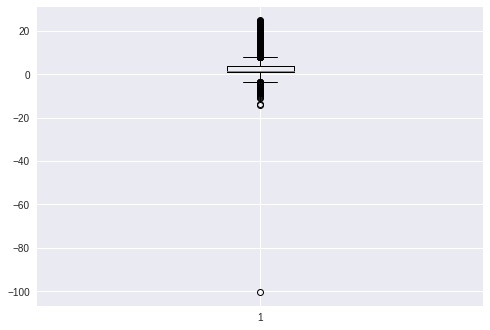

In [17]:
tt = df_cleaned['TOUCH_TIME']
plt.boxplot(tt)
plt.show()

Vidimo kako značajka TOUCH_TIME ima stršeće vrijednosti, ali također ima i negativne vrijednosti što je definitivno krivo.

In [18]:
filt = df_cleaned['TOUCH_TIME'] < 0
df_cleaned.loc[filt,['TOUCH_TIME']]

,TOUCH_TIME
748,-4.3
775,-0.4
1043,-2.3
1118,-3.2
1260,-1.3
...,...
122833,-4.2
123031,-1.2
123070,-8.8
123072,-0.4


Imamo 300 zapisa s negativnim vrijednostima atributa TOUCH_TIME pa ćemo ih promijeniti tako da umjesto negativne vrijednosti imaju prosjek ostalih zapisa atributa.

In [19]:

df_cleaned.loc[df_cleaned['TOUCH_TIME']< 0,'TOUCH_TIME'] = df_cleaned['TOUCH_TIME'].mean()
df_cleaned['TOUCH_TIME'].describe()


count    126056.000000
mean          2.782943
std           2.989224
min           0.000000
25%           0.900000
50%           1.600000
75%           3.700000
max          24.900000
Name: TOUCH_TIME, dtype: float64

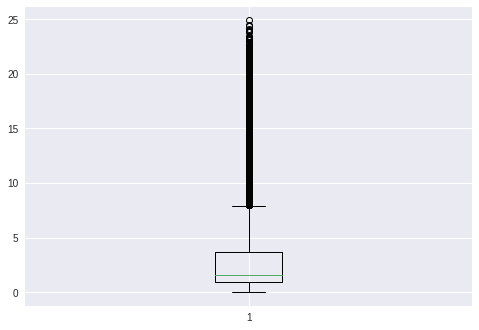

In [20]:
tt = df_cleaned['TOUCH_TIME']
plt.boxplot(tt)
plt.show()

# **Vizualizacija podataka**

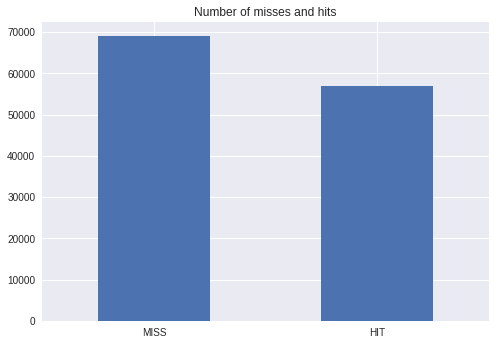

In [21]:
#Broj promašaja i pogodaka
df_cleaned['FGM'].value_counts().plot(kind="bar",title="Number of misses and hits")
plt.xticks((0,1),('MISS','HIT'),rotation='horizontal')
plt.show()


In [22]:
np.round((df_cleaned['FGM'].value_counts() / len(df_cleaned) * 100),2).astype(str) + '%'

0    54.77%
1    45.23%
Name: FGM, dtype: object

In [23]:
#Pregledom podataka shvatio sam da postoji anomalija gdje su šutevi dalje od trice, a prikazani su kao 2 poena
df_cleaned[df_cleaned['SHOT_DIST'] > 8].sort_values('PTS_TYPE')

,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSE_DEF_DIST,FGM,PTS,player_name
80911,1,4,2,94,11.3,1,1.6,8.53440,2,"Parker, Tony",0.42672,0,0,mike conley
66098,1,4,2,214,19.1,0,0.0,8.71728,2,"Robinson, Glenn",3.59664,1,2,gerald green
61281,0,2,1,445,11.5,0,1.1,8.26008,2,"Augustin, D.J.",1.58496,0,0,ty lawson
2892,1,17,3,34,16.7,8,7.3,8.62584,2,"Payton, Elfrid",1.46304,1,2,kemba walker
35472,0,10,2,102,3.0,0,3.9,8.59536,2,"Lowry, Kyle",3.53568,0,0,mnta ellis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40409,1,10,4,209,17.0,7,8.4,8.44296,3,"Temple, Garrett",1.58496,1,3,evan fournier
40412,0,3,1,452,14.3,0,0.6,8.22960,3,"Gordon, Eric",2.13360,1,3,evan fournier
40415,0,6,2,0,0.0,2,1.7,10.94232,3,"Evans, Tyreke",0.97536,0,0,evan fournier
40259,1,15,4,17,17.0,3,3.3,8.13816,3,"Chalmers, Mario",0.27432,0,0,evan fournier


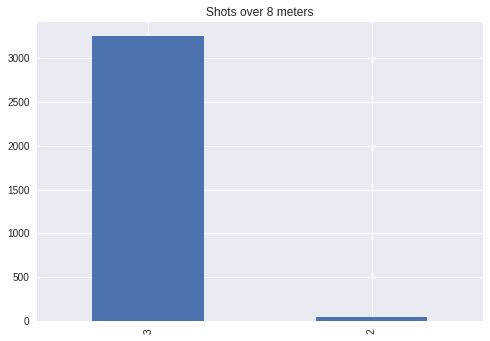

In [24]:
df_cleaned[df_cleaned['SHOT_DIST'] > 8 ]['PTS_TYPE'].value_counts().plot(kind="bar",title='Shots over 8 meters')
plt.show()


Možemo vidjeti da ovdje nešto ne valja. Šutevi koji su preko 8 metara sigurno moraju biti za 3 poena, ali vidimo da ih ima i koji su za 2 poena.

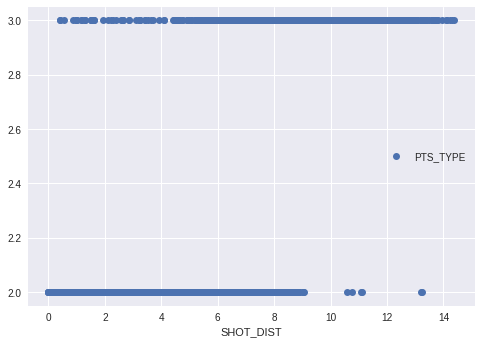

In [25]:
df_cleaned.plot('SHOT_DIST','PTS_TYPE',style='o')
plt.show()


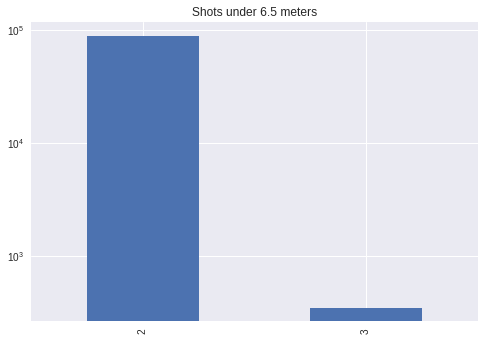

In [26]:
df_cleaned[df_cleaned['SHOT_DIST'] < 6.5 ]['PTS_TYPE'].value_counts().plot(kind="bar",title='Shots under 6.5 meters')
plt.yscale('log')


Vidimo da postoje anomalije u podacima. Kasnije ćemo odlučiti što ćemo napraviti s tim.

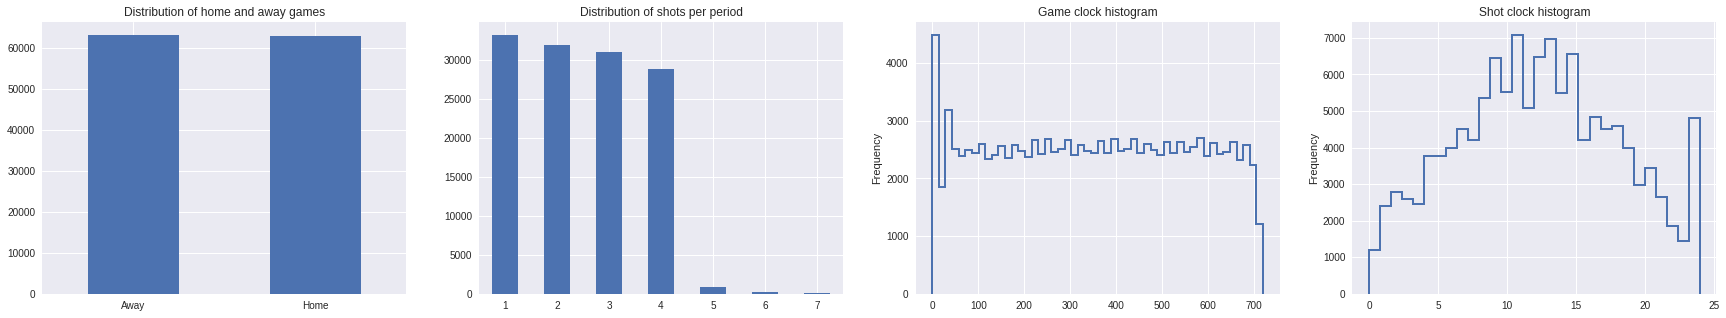

In [27]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4,figsize=(30, 5))

ax1 = df_cleaned['LOCATION'].value_counts().plot(kind="bar",title='Distribution of home and away games',ax=ax1)
ax1.set_xticks((0,1))
ax1.set_xticklabels(('Away','Home'),rotation='horizontal')


ax2 = df_cleaned['PERIOD'].value_counts().plot(kind="bar",title='Distribution of shots per period',ax=ax2)
ax2.set_xticklabels(([i for i in range(1,8)]),rotation='horizontal')

ax3 = df_cleaned['GAME_CLOCK'].plot(kind="hist",bins=50,histtype='step',title="Game clock histogram",ax=ax3,lw="2")

ax4= df_cleaned['SHOT_CLOCK'].plot(kind="hist",bins=30,histtype='step',title="Shot clock histogram",ax=ax4,lw="2")




plt.show()

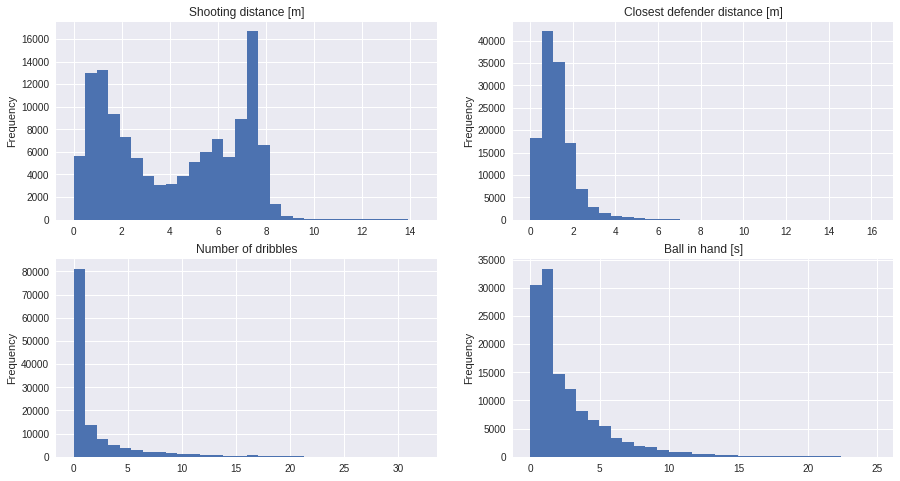

In [28]:
fig, axs = plt.subplots(2,2,figsize=(15, 8))

ax1 = df_cleaned['SHOT_DIST'].plot.hist(bins=30,ax=axs[0,0])
ax1.set_title("Shooting distance [m]")

ax2 = df_cleaned['CLOSE_DEF_DIST'].plot.hist(bins=30,ax=axs[0,1])
ax2.set_title("Closest defender distance [m]")

ax3 = df_cleaned['DRIBBLES'].plot.hist(bins=30,ax=axs[1,0])
ax3.set_title("Number of dribbles")

ax4 = df_cleaned['TOUCH_TIME'].plot.hist(bins=30,ax=axs[1,1])
ax4.set_title("Ball in hand [s]")

plt.show()

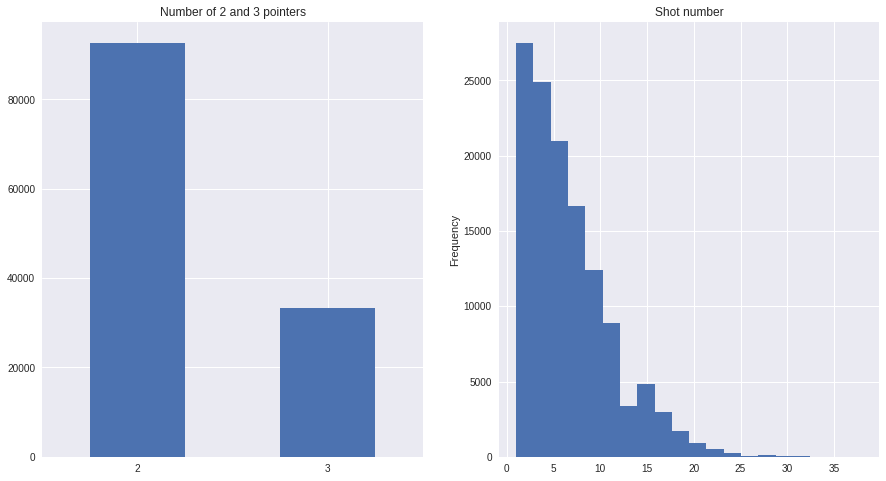

In [29]:
fig, axs = plt.subplots(1,2,figsize=(15, 8))


ax1 = df_cleaned['PTS_TYPE'].value_counts().plot(kind="bar",title="Number of 2 and 3 pointers",ax=axs[0])
ax1.set_xticklabels((2,3),rotation='horizontal')

ax2 = df_cleaned['SHOT_NUMBER'].plot.hist(bins=20,ax=axs[1])
ax2.set_title("Shot number")

plt.show()

In [30]:
#Broj šuteva za 2 u odnosu na broj šuteva za 3
np.round((df_cleaned['PTS_TYPE'].value_counts() / len(df_cleaned) * 100),2).astype(str) + '%'

2    73.53%
3    26.47%
Name: PTS_TYPE, dtype: object

Pogledajmo udaljenost protivnika s obzirom na vrstu šuta

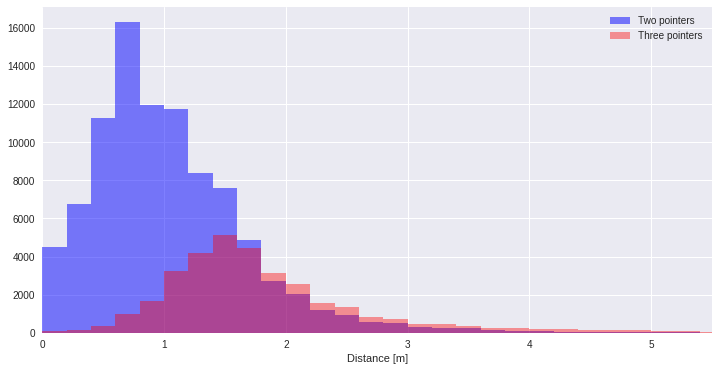

In [31]:
plt.figure(figsize = [12, 6]);
bins = np.arange(0.0, 6.0, 0.2)
plt.hist(df_cleaned[df_cleaned['PTS_TYPE'] == 2]['CLOSE_DEF_DIST'],bins=bins,alpha=0.5,label="Two pointers",color="blue")
plt.hist(df_cleaned[df_cleaned['PTS_TYPE'] == 3]['CLOSE_DEF_DIST'],bins=bins,alpha=0.4,label="Three pointers",color="red")
plt.xlim(0,5.5)
plt.xlabel("Distance [m]")
plt.legend()
plt.show()

## **Odnos postotka pogotka s ostalim relevantnim značajkama**

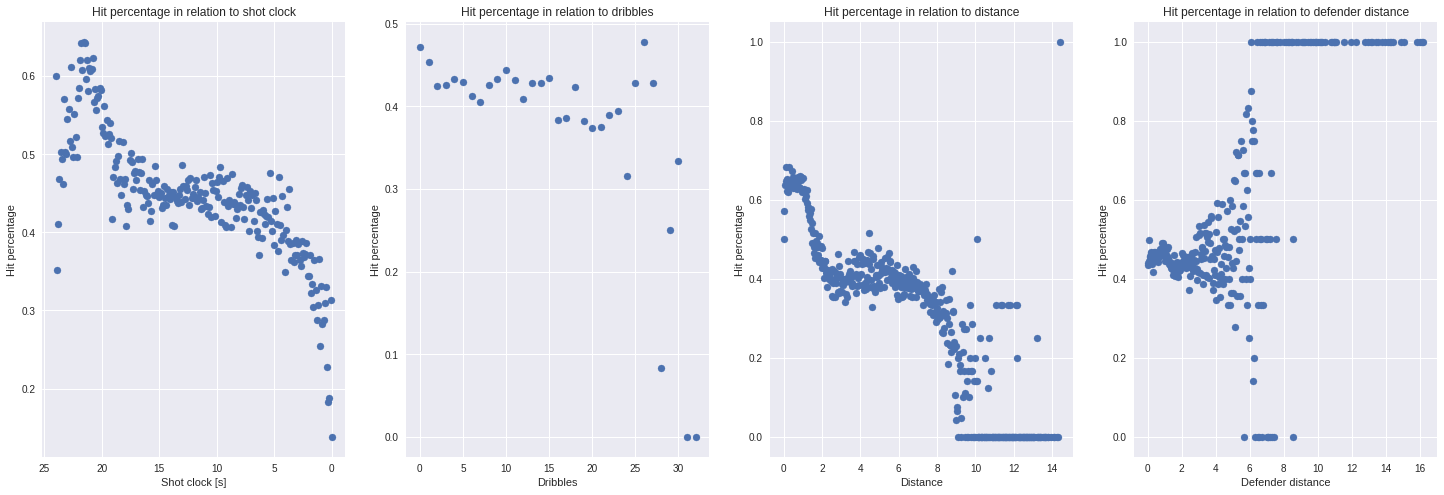

In [32]:
fig, axs = plt.subplots(1,4,figsize=(25, 8))
score_clock = df_cleaned.groupby('SHOT_CLOCK').mean()
axs[0].scatter(score_clock['FGM'].index,score_clock['FGM'].values)
axs[0].invert_xaxis()
axs[0].set_title("Hit percentage in relation to shot clock")
axs[0].set_xlabel("Shot clock [s]")
axs[0].set_ylabel("Hit percentage")

score_dribble = df_cleaned.groupby('DRIBBLES').mean()
axs[1].scatter(score_dribble['FGM'].index,score_dribble['FGM'].values)
axs[1].set_title("Hit percentage in relation to dribbles")
axs[1].set_xlabel("Dribbles")
axs[1].set_ylabel("Hit percentage")

score_distance = df_cleaned.groupby('SHOT_DIST').mean()
axs[2].scatter(score_distance['FGM'].index,score_distance['FGM'].values)
axs[2].set_title("Hit percentage in relation to distance")
axs[2].set_xlabel("Distance")
axs[2].set_ylabel("Hit percentage")


score_def_distance = df_cleaned.groupby('CLOSE_DEF_DIST').mean()
axs[3].scatter(score_def_distance['FGM'].index,score_def_distance['FGM'].values)
axs[3].set_title("Hit percentage in relation to defender distance")
axs[3].set_xlabel("Defender distance")
axs[3].set_ylabel("Hit percentage")


plt.show()

##  **Odnos vrijednosti nekih značajki u usporedbi je li koš zabijen ili promašen**

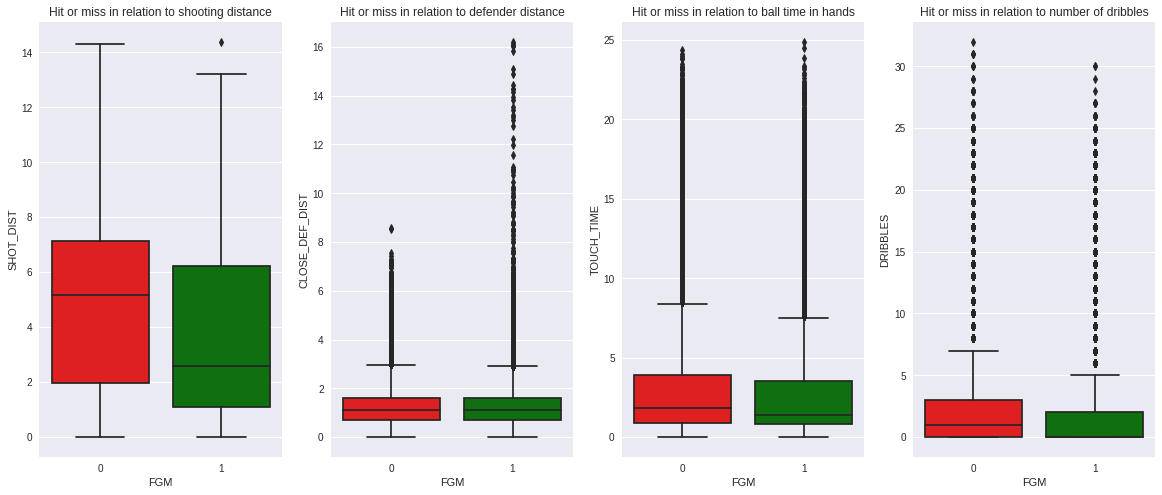

In [33]:
fig, axs = plt.subplots(1,4,figsize=(20, 8))

my_pal = {1: "g", 0: "r"}


ax1 = sns.boxplot(x=df_cleaned['FGM'],y=df_cleaned['SHOT_DIST'],ax=axs[0],palette=my_pal)
ax1.title.set_text('Hit or miss in relation to shooting distance')

ax2 = sns.boxplot(x=df_cleaned['FGM'],y=df_cleaned['CLOSE_DEF_DIST'],ax=axs[1],palette=my_pal)
ax2.title.set_text('Hit or miss in relation to defender distance')

ax3 = sns.boxplot(x=df_cleaned['FGM'],y=df_cleaned['TOUCH_TIME'],ax=axs[2],palette=my_pal)
ax3.title.set_text('Hit or miss in relation to ball time in hands')

ax4 = sns.boxplot(x=df_cleaned['FGM'],y=df_cleaned['DRIBBLES'],ax=axs[3],palette=my_pal)
ax4.title.set_text('Hit or miss in relation to number of dribbles')

plt.show()

## **Analiza korelacije značajki**

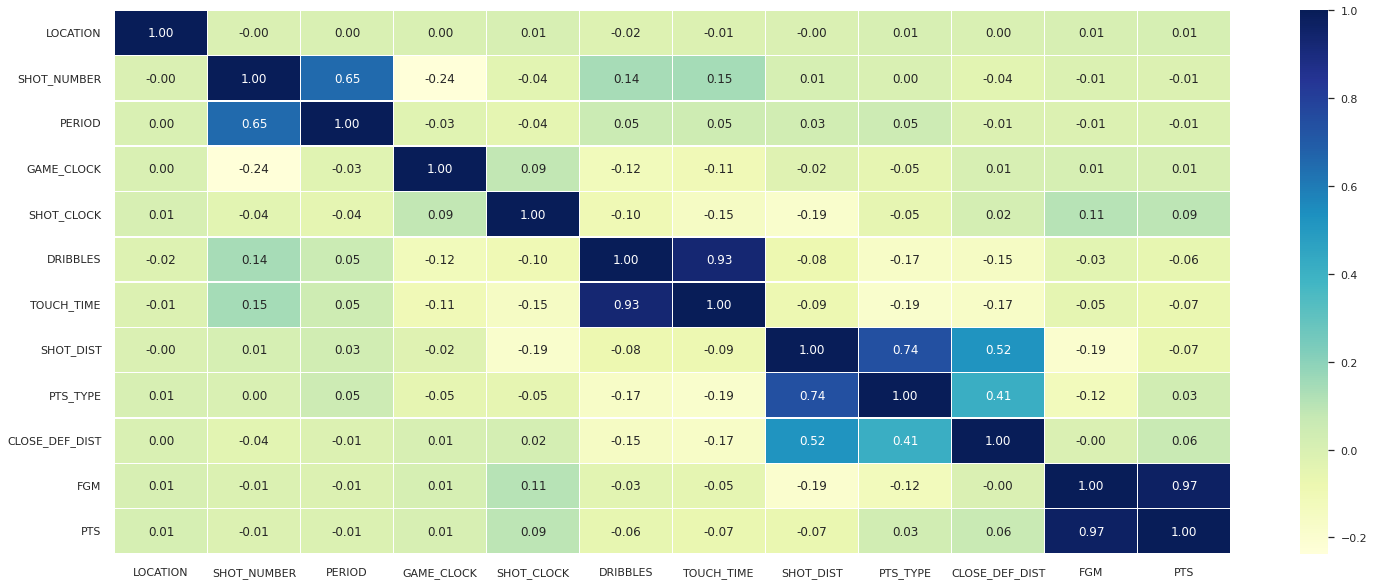

In [34]:
sns.set(rc={'figure.figsize':(25,10)})
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

# **Replikacija rezultata**


In [35]:
df_replicate = df_cleaned.drop(columns=['CLOSEST_DEFENDER','player_name','PTS'])


In [36]:
total_game_time = []
for i in range(len(df_replicate)):
    game_time = df_replicate.loc[i, "PERIOD"] * df_replicate.loc[i, "GAME_CLOCK"]
    total_game_time.append(game_time)
df_replicate['TOTAL_GAME_TIME'] = total_game_time


df_replicate.describe()

,LOCATION,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TOTAL_GAME_TIME
count,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000
mean,0.499040,6.531819,2.475186,351.008734,12.222342,2.029059,2.782943,4.136011,2.264716,1.256647,0.452291,862.443652
std,0.500001,4.723465,1.139844,207.730841,5.901163,3.484861,2.989224,2.709570,0.441183,0.839862,0.497721,682.601076
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,172.000000,7.900000,0.000000,0.900000,1.432560,2.000000,0.701040,0.000000,324.750000
50%,0.000000,5.000000,2.000000,352.000000,12.100000,1.000000,1.600000,4.175760,2.000000,1.127760,0.000000,658.000000
75%,1.000000,9.000000,3.000000,531.000000,16.500000,2.000000,3.700000,6.858000,3.000000,1.615440,1.000000,1286.000000
max,1.000000,38.000000,7.000000,720.000000,24.000000,32.000000,24.900000,14.386560,3.000000,16.215360,1.000000,2868.000000


In [37]:
#Mijenjanje krivih zapisa(šutevi koji su ispod 6.6 metara su prebačeni iz 3 u 2 poena, a oni iznad 6.8 iz 2 u 3 poena)

print(df_replicate[df_replicate['SHOT_DIST'] < 6.6 ]['PTS_TYPE'].value_counts())
print(df_replicate[df_replicate['SHOT_DIST'] > 6.8 ]['PTS_TYPE'].value_counts())


df_replicate.loc[(df_replicate['PTS_TYPE'] == 3) & (df_replicate['SHOT_DIST'] < 6.6) ,'PTS_TYPE'] = 2
df_replicate.loc[(df_replicate['PTS_TYPE'] == 2) & (df_replicate['SHOT_DIST'] > 6.8) ,'PTS_TYPE'] = 3


print(df_replicate[df_replicate['SHOT_DIST'] < 6.6 ]['PTS_TYPE'].value_counts())
print(df_replicate[df_replicate['SHOT_DIST'] > 6.8 ]['PTS_TYPE'].value_counts())

2    89641
3      480
Name: PTS_TYPE, dtype: int64
3    31131
2     1696
Name: PTS_TYPE, dtype: int64
2    90121
Name: PTS_TYPE, dtype: int64
3    32827
Name: PTS_TYPE, dtype: int64


In [41]:
shots_scaled = df_replicate.copy()
shots_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126056 entries, 0 to 126055
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   LOCATION         126056 non-null  int64  
 1   SHOT_NUMBER      126056 non-null  int64  
 2   PERIOD           126056 non-null  int64  
 3   GAME_CLOCK       126056 non-null  int64  
 4   SHOT_CLOCK       126056 non-null  float64
 5   DRIBBLES         126056 non-null  int64  
 6   TOUCH_TIME       126056 non-null  float64
 7   SHOT_DIST        126056 non-null  float64
 8   PTS_TYPE         126056 non-null  int64  
 9   CLOSE_DEF_DIST   126056 non-null  float64
 10  FGM              126056 non-null  int64  
 11  TOTAL_GAME_TIME  126056 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 11.5 MB


## LOGISTIC AND SVM

In [42]:
#Logisitc and SVM
X = shots_scaled.drop(columns=["PERIOD","FGM","GAME_CLOCK"]).values
y = shots_scaled['FGM'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


#Standard se koristi kada znamo da je u pozadini normalna distribucija, Robust je za outliere, minMax kada ne znamo koja je distribucija
standardSc = StandardScaler()
robustSc = RobustScaler()
minMaxSc = MinMaxScaler()

X_train_scaled[:,2] = standardSc.fit_transform(X_train[:,2].reshape(-1,1))[:,0]
X_train_scaled[:,[1,3,4,7]] = robustSc.fit_transform(X_train[:,[1,3,4,7]])
X_train_scaled[:,[5,8]] = minMaxSc.fit_transform(X_train[:,[5,8]])



X_test_scaled[:,2] = standardSc.fit_transform(X_test_scaled[:,2].reshape(-1,1))[:,0]
X_test_scaled[:,[1,3,4,7]] = robustSc.fit_transform(X_test_scaled[:,[1,3,4,7]])
X_test_scaled[:,[5,8]] = minMaxSc.fit_transform(X_test_scaled[:,[5,8]])



clf = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#print(clf.coef_)

print("#"*100)


clf_SVM = SVC().fit(X_train_scaled[0:40000,:],y_train[0:40000])
y_SVM_pred = clf_SVM.predict(X_test_scaled)
print(confusion_matrix(y_test, y_SVM_pred))
print(accuracy_score(y_test, y_SVM_pred))



[[2590  846]
 [1558 1309]]
0.6185943201650008
####################################################################################################
[[2879  557]
 [1852 1015]]
0.6178010471204188


## NEURAL NETWORK

In [47]:
#NeuralNetworks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


#Standard se koristi kada znamo da je u pozadini normalna distribucija, Robust je za outliere, minMax kada ne znamo koja je distribucija ili ako je skewed
standardSc = StandardScaler()
robustSc = RobustScaler()
minMaxSc = MinMaxScaler()


X_train_scaled[:,2] = standardSc.fit_transform(X_train[:,2].reshape(-1,1))[:,0]
X_train_scaled[:,[1,3,4,7]] = robustSc.fit_transform(X_train[:,[1,3,4,7]])
X_train_scaled[:,[5,8]] = minMaxSc.fit_transform(X_train[:,[5,8]])



X_test_scaled[:,2] = standardSc.fit_transform(X_test_scaled[:,2].reshape(-1,1))[:,0]
X_test_scaled[:,[1,3,4,7]] = robustSc.fit_transform(X_test_scaled[:,[1,3,4,7]])
X_test_scaled[:,[5,8]] = minMaxSc.fit_transform(X_test_scaled[:,[5,8]])



clfSigm = MLPClassifier(hidden_layer_sizes=(50,),activation="logistic",batch_size=1000,learning_rate_init=5).fit(X_train_scaled, y_train)
clfRelu = MLPClassifier(hidden_layer_sizes=(50,),activation="relu",batch_size=1000,learning_rate_init=5).fit(X_train_scaled, y_train)


sigmPred = clfSigm.predict(X_test_scaled)
reluPred = clfRelu.predict(X_test_scaled)


print(confusion_matrix(y_test, sigmPred))
print(accuracy_score(y_test, sigmPred))
print(confusion_matrix(y_test, reluPred))
print(accuracy_score(y_test, reluPred))

[[6898    0]
 [5708    0]]
0.5471997461526258
[[6898    0]
 [5708    0]]
0.5471997461526258


## NAIVE BAYES

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)



clfNB =  GaussianNB().fit(X_train, y_train)
NBpred = clfNB.predict(X_test)

print(confusion_matrix(y_test, NBpred))
print(accuracy_score(y_test, NBpred))

[[2026 1362]
 [1302 1613]]
0.5773441218467397


## RANDOM FOREST

In [40]:
df_forest= df_replicate.copy()
X = df_forest.drop(columns=["FGM","PERIOD","GAME_CLOCK"])
y = df_forest['FGM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
test_param = {
    "n_estimators": [10,50,80, 100],
    "max_depth": [1, 5, 10],
    "max_features": ["auto", "sqrt"]
}


clfRF = RandomForestClassifier()


grid_search = GridSearchCV(clfRF, test_param, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

clfRF = RandomForestClassifier(n_estimators=80,bootstrap=False,max_depth=10).fit(X_train, y_train)
RFpred = clfRF.predict(X_test)
print(confusion_matrix(y_test, RFpred))
print(accuracy_score(y_test, RFpred))


[[2944  497]
 [1893  969]]
0.6208154846898303


## XGBOOST

In [ ]:
df_xgboost = df_replicate.drop(columns=['PERIOD','LOCATION','SHOT_NUMBER','GAME_CLOCK','DRIBBLES','PTS_TYPE'])
X = df_xgboost.drop(columns=["FGM"]).values
y = df_xgboost['FGM'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)



test_param = {
    'min_child_weight':[0.0001,0.001,0.01],
    'learning_rate':[0.00001,0.0001,0.001,0.01],
    'n_estimators':[1,3,5,10],
    'max_depth':[2,3,5]
}


XGB = xgb.XGBClassifier()
gridS = GridSearchCV(estimator = XGB, param_grid = test_param, scoring='precision')
gridS.fit(X_train,y_train)
print('best params')
print (gridS.best_params_)
print('best score')
print (gridS.best_score_) 






best params
{'learning_rate': 1e-05, 'max_depth': 3, 'min_child_weight': 0.0001, 'n_estimators': 1}
best score
0.6824566264771081


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
xgb2 = xgb.XGBClassifier(max_depth=3,learning_rate=1e-05,n_estimators=1,min_child_weight=1e-04)
xgb2.fit(X_train,y_train)
pred = xgb2.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))


[[6170  740]
 [4113 1583]]
0.615024591464382
